In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
torch.cuda.is_available()

True

In [3]:
# read in all the names
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one
X, Y = [], []
for w in words:
    
#     print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
#         print(''.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix] # crop and append
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [8]:
C = torch.randn((27,2))

In [9]:
F.one_hot(torch.tensor(5), num_classes = 27).float() @ C

tensor([-0.0328, -1.4096])

In [10]:
C[X]

tensor([[[-0.9291, -1.7764],
         [-0.9291, -1.7764],
         [-0.9291, -1.7764]],

        [[-0.9291, -1.7764],
         [-0.9291, -1.7764],
         [-0.0328, -1.4096]],

        [[-0.9291, -1.7764],
         [-0.0328, -1.4096],
         [-1.0395,  0.3895]],

        ...,

        [[ 0.5310, -0.1101],
         [ 0.5310, -0.1101],
         [-0.8377,  0.8432]],

        [[ 0.5310, -0.1101],
         [-0.8377,  0.8432],
         [ 0.5310, -0.1101]],

        [[-0.8377,  0.8432],
         [ 0.5310, -0.1101],
         [ 0.1482, -0.0910]]])

In [11]:
X[13, 2]

tensor(1)

In [12]:
C[X][13,2] # embedding for 1

tensor([-0.7277,  0.7411])

In [13]:
C[1]

tensor([-0.7277,  0.7411])

In [14]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [15]:
W1 = torch.randn((6, 100)) # input  is 3 2D embeddings so input shape 6 and number of neurons = 100
b1 = torch.randn(100)

In [16]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (684438x2 and 6x100)

In [17]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1).shape

torch.Size([228146, 6])

In [18]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([228146, 6])

In [19]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [20]:
a.shape

torch.Size([18])

In [21]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [22]:
a.storage()

C:\Users\RISHIT\AppData\Local\Temp\ipykernel_24476\214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [23]:
emb.shape

torch.Size([228146, 3, 2])

In [24]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

RuntimeError: shape '[32, 6]' is invalid for input of size 1368876

In [25]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)

In [26]:
h.shape

torch.Size([228146, 100])

In [27]:
h

tensor([[-1.0000,  1.0000,  0.9989,  ...,  0.9516, -0.9986,  0.9968],
        [-1.0000,  1.0000,  0.9778,  ...,  0.9522, -0.9951,  0.9929],
        [-0.9995,  1.0000,  0.9986,  ...,  0.6522, -0.9994, -0.0063],
        ...,
        [ 0.8459,  0.0107,  0.9052,  ..., -0.4514, -0.9848, -0.3850],
        [ 0.1373, -0.5955, -0.7160,  ...,  0.1857, -0.2140,  0.9999],
        [ 0.1832,  0.4573, -0.0741,  ...,  0.2879, -0.9594, -0.9250]])

In [28]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [29]:
logits = h @ W2 + b2
logits.shape

torch.Size([228146, 27])

In [30]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims = True)

In [31]:
prob.shape

torch.Size([228146, 27])

In [32]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [33]:
Y.shape

torch.Size([228146])

In [34]:
# ---------- summary ---------- #

In [35]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [36]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g) # 2D embeddings 
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.rand(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [37]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [38]:
for p in parameters:
    p.requires_grad = True

In [39]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [51]:
lri = []
lossi = []

for i in range(10000):
    
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    
    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 +  b1) # (32, 100)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix])
#     print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    #update
#     lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
    lri.append(lre[i])
    lossi.append(loss.item())
print(loss.item())

IndexError: index 1000 is out of bounds for dimension 0 with size 1000

In [41]:
loss

tensor(2.6857, grad_fn=<NllLossBackward0>)

In [42]:
F.cross_entropy(logits, Y)

ValueError: Expected input batch_size (32) to match target batch_size (228146).

In [44]:
logits.max(1)

torch.return_types.max(
values=tensor([1.6316, 6.5362, 1.5060, 3.2405, 4.4660, 2.2738, 2.8404, 3.2773, 4.2533,
        4.4660, 2.7235, 3.4640, 3.2252, 4.8950, 2.7220, 4.4660, 1.7315, 4.4660,
        0.7156, 2.4475, 1.0369, 3.7675, 4.4660, 2.1100, 2.6086, 4.1938, 2.5233,
        1.9596, 5.2958, 4.1067, 1.7297, 3.2026], grad_fn=<MaxBackward0>),
indices=tensor([ 5,  1,  0, 14,  1,  0, 18,  9, 14,  1, 18,  1, 18,  1,  9,  1,  1,  1,
         0,  9,  1,  9,  1,  0,  1,  1,  9,  1,  1,  1, 18,  0]))

In [45]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [46]:
torch.randint(0, X.shape[0], (32,))

tensor([ 30913, 214198, 164970, 143705,  65851, 181511,   6766, 132913, 206314,
         37778,  74582, 127198, 176088, 104231, 108800, 161856, 179274, 188694,
         69651,   8491, 193949, 162957,  44350, 131657,   5103, 159798, 105299,
         55577,   4777,  69202, 141874, 117178])

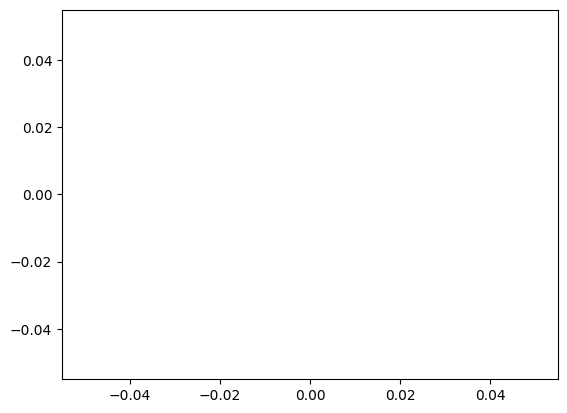

In [47]:
plt.plot(lri, lossi)

In [49]:
# 0.1 is the best learning rate
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 +  b1) # (32, 100)
logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y)
loss

tensor(2.5067, grad_fn=<NllLossBackward0>)

In [50]:
# training split, validation split, test split
# 80%, 10%, 10%

In [166]:
# build the dataset

def build_dataset(words):
    block_size = 4 # context length: how many characters do we take to predict the next one?
    X, Y = [], []
    for w in words:
        
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182441, 4]) torch.Size([182441])
torch.Size([22902, 4]) torch.Size([22902])
torch.Size([22803, 4]) torch.Size([22803])


In [167]:
# -------- train on train set --------- #

In [168]:
Xtr.shape, Ytr.shape

(torch.Size([182441, 4]), torch.Size([182441]))

In [169]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator = g) # 10D embeddings 
W1 = torch.randn((40, 200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200, 27), generator = g)
b2 = torch.rand(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [170]:
sum(p.nelement() for p in parameters) # number of parameters in total

13897

In [171]:
for p in parameters:
    p.requires_grad = True

In [58]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [90]:
lri = []
lossi = []
stepi = []

In [98]:
for i in range(50000):
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 +  b1) # (32, 100)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    #update
#     lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
#     lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

1.7885361909866333


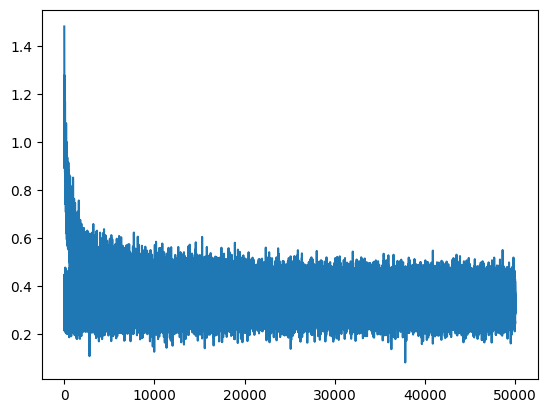

In [99]:
plt.plot(stepi, lossi)

In [100]:
# 0.1 is the best learning rate
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 +  b1) # (32, 100)
logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1694, grad_fn=<NllLossBackward0>)

In [101]:
# 0.1 is the best learning rate
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 +  b1) # (32, 100)
logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1986, grad_fn=<NllLossBackward0>)

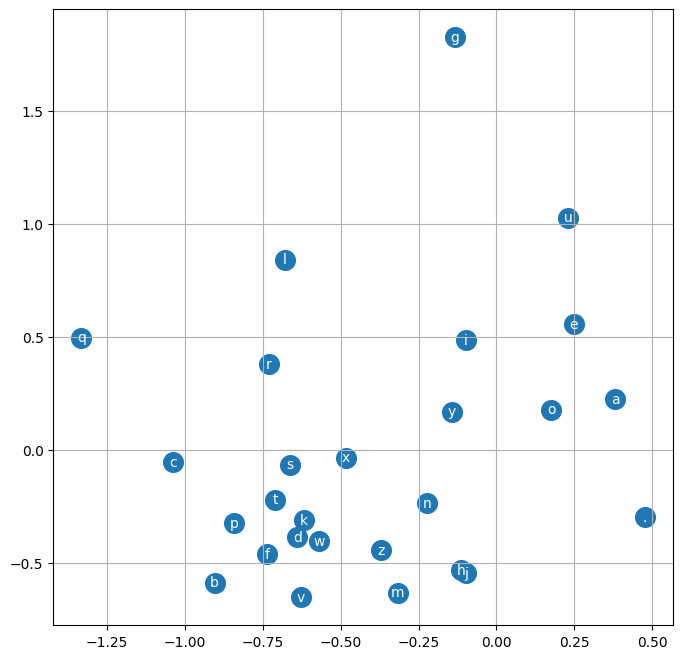

In [85]:
plt.figure(figsize = (8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha = "center", va = "center", color = "white")
plt.grid('minor')

In [102]:
# final

In [172]:
lri = []
lossi = []
stepi = []

In [173]:
for i in range(400000):
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 4, 2)
    h = torch.tanh(emb.view(-1, 40) @ W1 +  b1) # (32, 100)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    #update
#     lr = lrs[i]
    lr = 0.1 if i < 200000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
#     lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

2.064912796020508


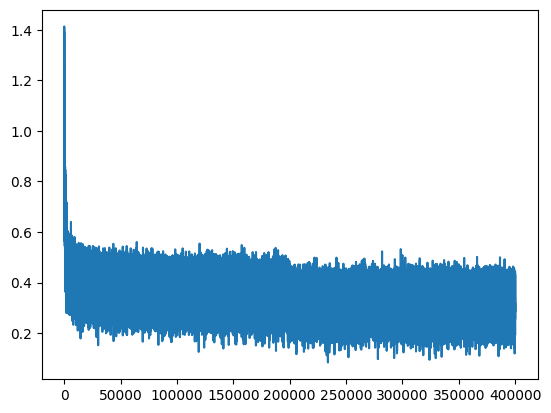

In [174]:
plt.plot(stepi, lossi)

In [175]:
# 0.1 is the best learning rate
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 40) @ W1 +  b1) # (32, 100)
logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1020, grad_fn=<NllLossBackward0>)

In [176]:
# 0.1 is the best learning rate
emb = C[Xdev] # (32, 4, 2)
h = torch.tanh(emb.view(-1, 40) @ W1 +  b1) # (32, 100)
logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1509, grad_fn=<NllLossBackward0>)

In [180]:
# sample from the model

block_size = 4

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 +  b2
        probs = F.softmax(logits, dim = 1)
        ix = torch.multinomial(probs, num_samples = 1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

nailen.
makyana.
aloanna.
danie.
jeno.
rhya.
alorya.
dariahi.
mishika.
nirds.
eraina.
avria.
gray.
soniice.
mivna.
chari.
elah.
reen.
jeslei.
iafen.


In [164]:
emb.shape

torch.Size([1, 4, 10])

In [165]:
block_size

4